In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [22]:
data = pd.read_csv("df1.csv", low_memory=False)
data.head()

,Average,day,month,year,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Apple(Jholey),Banana,Carrot(Local),Cucumber(Local),Garlic Dry Nepali,Lettuce,Onion Dry (Indian),Potato White,Tomato Big(Nepali),Date
0,3.860730,1.0,1.0,2019.0,False,False,False,True,False,False,False,False,False,False,False,False,True,2019-01-01
1,3.113515,1.0,1.0,2019.0,False,False,False,True,False,False,False,False,False,False,False,True,False,2019-01-01
2,3.295837,1.0,1.0,2019.0,False,False,False,True,False,False,False,False,False,False,True,False,False,2019-01-01
3,4.051785,1.0,1.0,2019.0,False,False,False,True,False,False,True,False,False,False,False,False,False,2019-01-01
4,4.553877,1.0,1.0,2019.0,False,False,False,True,False,False,False,False,False,True,False,False,False,2019-01-01


In [12]:
X = data.drop(['Average','Date'], axis=1)
y = data['Average']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [13]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters like 'n_estimators'

# Train the model
random_forest.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
y_pred = random_forest.predict(x_test)
mse = mean_squared_error(y_pred, y_test)
accuracy = random_forest.score(x_test, y_test) * 100
r2 = r2_score(y_test, y_pred)
print("R-squared value for the test set:", r2)

print("MACHINE LEARNING MODEL'S MEAN SQUARE ERROR\t:\t", mse)
print("MACHINE LEARNING MODEL'S ACCURACY\t\t:\t", accuracy, '%')

R-squared value for the test set: 0.9784417679681545
MACHINE LEARNING MODEL'S MEAN SQUARE ERROR	:	 0.008994190712793393
MACHINE LEARNING MODEL'S ACCURACY		:	 97.84417679681545 %


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming 'X' and 'y' are your features and target variable
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data.drop(['Average'], axis = 1),
 data.Average, test_size = 0.2)

# Train the model on the training set
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model2.predict(X_val)

# Calculate R-squared for the validation set
r2_val = r2_score(y_val, y_pred)
print("R-squared value for validation set:", r2_val)


R-squared value for validation set: 0.6299902460744551


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [42]:
X = data.drop('Average', axis=1)
y = data['Average']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [43]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [44]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_pred, y_test)
accuracy = model.score(x_test, y_test) * 100

print("MACHINE LEARNING MODEL'S MEAN SQUARE ERROR\t:\t", mse)
print("MACHINE LEARNING MODEL'S ACCURACY\t\t:\t", accuracy, '%')

MACHINE LEARNING MODEL'S MEAN SQUARE ERROR	:	 0.15244932017524007
MACHINE LEARNING MODEL'S ACCURACY		:	 63.45932699914692 %


In [20]:
import numpy as np

last_date_tomato = data[data['Tomato Big(Nepali)'].notnull()]['year'].max()

# Create a DataFrame for the next day for 'Tomato Big(Nepali)'
next_date = pd.Timestamp(year=int(last_date_tomato), month=int(data[data['Tomato Big(Nepali)'].notnull()]['month'].max()), day=int(data[data['Tomato Big(Nepali)'].notnull()]['day'].max())) + pd.Timedelta(days=1)
next_day_data = pd.DataFrame({'Date': [next_date]})

features = data.columns[1:] 
next_day_data[features] = data[data['Tomato Big(Nepali)'].notnull()].iloc[-1][1:]

X_next_day = next_day_data.drop('Date', axis=1)
predicted_price_next_day = random_forest.predict(X_next_day.values.reshape(1, -1))
predicted_price_next_day_original_scale = np.exp(predicted_price_next_day)

print("Predicted Price for Tomato Big(Nepali) for the Next Day:", predicted_price_next_day_original_scale[0])


Predicted Price for Tomato Big(Nepali) for the Next Day: 47.137303336903344


C:\Users\nirvi\AppData\Local\Temp\ipykernel_31392\1347828899.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  next_day_data[features] = data[data['Tomato Big(Nepali)'].notnull()].iloc[-1][1:]
C:\Users\nirvi\AppData\Local\Temp\ipykernel_31392\1347828899.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  next_day_data[features] = data[data['Tomato Big(Nepali)'].notnull()].iloc[-1][1:]
C:\Users\nirvi\AppData\Local\Temp\ipykernel_31392\1347828899.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Data

C:\Users\nirvi\AppData\Local\Temp\ipykernel_31392\4187972140.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  next_day_data[features] = data[data['Tomato Big(Nepali)'].notnull()].iloc[-1][1:]
C:\Users\nirvi\AppData\Local\Temp\ipykernel_31392\4187972140.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  next_day_data[features] = data[data['Tomato Big(Nepali)'].notnull()].iloc[-1][1:]
C:\Users\nirvi\AppData\Local\Temp\ipykernel_31392\4187972140.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Data

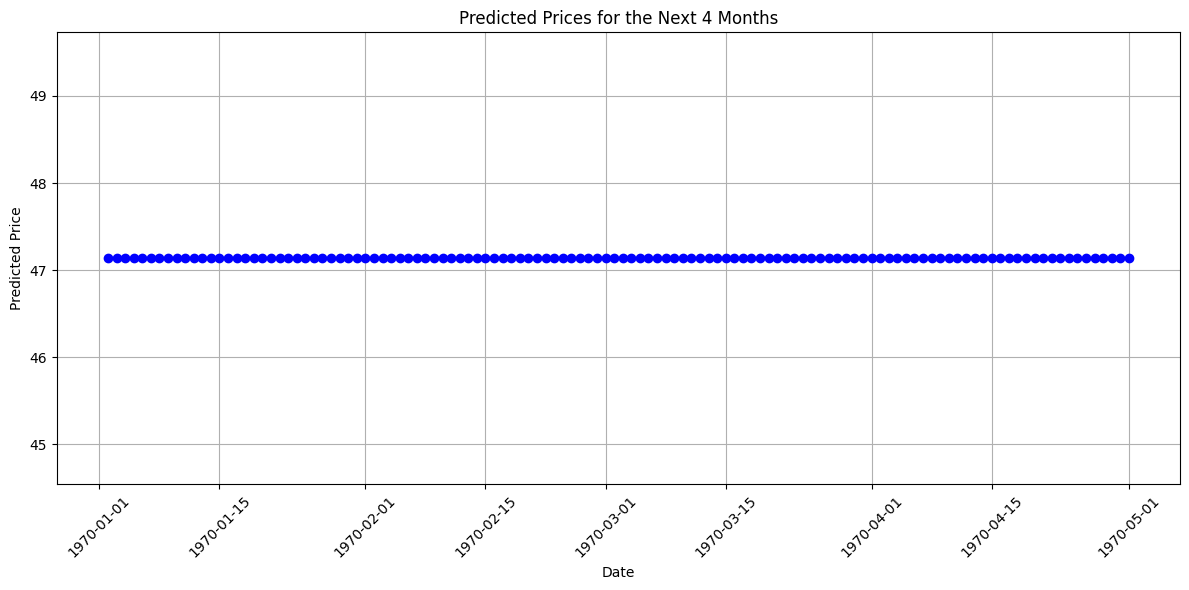

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('df1.csv')

predicted_prices_4_months = []
last_date_tomato = pd.Timestamp(data[data['Tomato Big(Nepali)'].notnull()]['year'].max(),
                                data[data['Tomato Big(Nepali)'].notnull()]['month'].max(),
                                data[data['Tomato Big(Nepali)'].notnull()]['day'].max())

for i in range(120):
    next_date = last_date_tomato + pd.Timedelta(days=i + 1)
    
    next_day_data = pd.DataFrame({'Date': [next_date]})
    features = data.columns[1:]
    next_day_data[features] = data[data['Tomato Big(Nepali)'].notnull()].iloc[-1][1:]
    
    X_next_day = next_day_data.drop('Date', axis=1)
    predicted_price_next_day = random_forest.predict(X_next_day.values.reshape(1, -1))
    predicted_price_next_day_original_scale = np.exp(predicted_price_next_day)
    
    predicted_prices_4_months.append(predicted_price_next_day_original_scale[0])

# Create dates for the next 120 days
dates = pd.date_range(start=last_date_tomato + pd.Timedelta(days=1), periods=120)

# Plot predicted prices for the next 120 days
plt.figure(figsize=(12, 6))
plt.plot(dates, predicted_prices_4_months, marker='o', linestyle='-', color='blue')
plt.title('Predicted Prices for the Next 4 Months')
plt.xlabel('Date')
plt.ylabel('Predicted Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
filtered_features = pd.read_csv('filtered_features.csv') 
data['Date'] = filtered_features['Date']

# Save the updated DataFrame 'df1' to a new CSV file or overwrite the existing one
data.to_csv('df1.csv', index=False)

In [15]:
columns_to_append = ['Date', 'Minimum', 'Maximum']

# Append columns from filtered_features to data
data = pd.concat([data, filtered_features[columns_to_append]], axis=1)
data.to_csv('df2.csv', index= False)

In [26]:
data.head()

,Average,day,month,year,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Apple(Jholey),Banana,Carrot(Local),Cucumber(Local),Garlic Dry Nepali,Lettuce,Onion Dry (Indian),Potato White,Tomato Big(Nepali),Date,Minimum,Maximum
0,3.860730,1.0,1.0,2019.0,False,False,False,True,False,False,False,False,False,False,False,False,True,2019-01-01,45.0,50.0
1,3.113515,1.0,1.0,2019.0,False,False,False,True,False,False,False,False,False,False,False,True,False,2019-01-01,20.0,25.0
2,3.295837,1.0,1.0,2019.0,False,False,False,True,False,False,False,False,False,False,True,False,False,2019-01-01,26.0,28.0
3,4.051785,1.0,1.0,2019.0,False,False,False,True,False,False,True,False,False,False,False,False,False,2019-01-01,55.0,60.0
4,4.553877,1.0,1.0,2019.0,False,False,False,True,False,False,False,False,False,True,False,False,False,2019-01-01,90.0,100.0


In [8]:
data = pd.read_csv("df2.csv", low_memory=False)
data.drop(columns=['Date'], inplace=True)
data.drop(columns=['Date.1'], inplace=True)



In [9]:
data.head()

,Average,day,month,year,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Apple(Jholey),Banana,Carrot(Local),Cucumber(Local),Garlic Dry Nepali,Lettuce,Onion Dry (Indian),Potato White,Tomato Big(Nepali),Minimum,Maximum
0,3.860730,1.0,1.0,2019.0,False,False,False,True,False,False,False,False,False,False,False,False,True,45.0,50.0
1,3.113515,1.0,1.0,2019.0,False,False,False,True,False,False,False,False,False,False,False,True,False,20.0,25.0
2,3.295837,1.0,1.0,2019.0,False,False,False,True,False,False,False,False,False,False,True,False,False,26.0,28.0
3,4.051785,1.0,1.0,2019.0,False,False,False,True,False,False,True,False,False,False,False,False,False,55.0,60.0
4,4.553877,1.0,1.0,2019.0,False,False,False,True,False,False,False,False,False,True,False,False,False,90.0,100.0


In [12]:
import numpy as np
data['Minimum'] = np.log(data.Minimum + 1e-10)
data['Maximum'] = np.log(data.Maximum + 1e-10)
data.head()

,Average,day,month,year,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Apple(Jholey),Banana,Carrot(Local),Cucumber(Local),Garlic Dry Nepali,Lettuce,Onion Dry (Indian),Potato White,Tomato Big(Nepali),Minimum,Maximum
0,3.860730,1.0,1.0,2019.0,False,False,False,True,False,False,False,False,False,False,False,False,True,1.336753,1.364055
1,3.113515,1.0,1.0,2019.0,False,False,False,True,False,False,False,False,False,False,False,True,False,1.097189,1.169032
2,3.295837,1.0,1.0,2019.0,False,False,False,True,False,False,False,False,False,False,True,False,False,1.181143,1.203634
3,4.051785,1.0,1.0,2019.0,False,False,False,True,False,False,True,False,False,False,False,False,False,1.388126,1.409607
4,4.553877,1.0,1.0,2019.0,False,False,False,True,False,False,False,False,False,True,False,False,False,1.504035,1.527180


In [15]:
X = data.drop('Average', axis=1)
y = data['Average']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [16]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters like 'n_estimators'

# Train the model
random_forest.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
y_pred = random_forest.predict(x_test)
mse = mean_squared_error(y_pred, y_test)
accuracy = random_forest.score(x_test, y_test) * 100
r2 = r2_score(y_test, y_pred)
print("R-squared value for the test set:", r2)

print("MACHINE LEARNING MODEL'S MEAN SQUARE ERROR\t:\t", mse)
print("MACHINE LEARNING MODEL'S ACCURACY\t\t:\t", accuracy, '%')

R-squared value for the test set: 0.9998572714876022
MACHINE LEARNING MODEL'S MEAN SQUARE ERROR	:	 5.954697299683423e-05
MACHINE LEARNING MODEL'S ACCURACY		:	 99.98572714876022 %


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
data = pd.read_csv("df1.csv", low_memory=False)

# Extract features and target variable
X = data.drop(['Average', 'Date'], axis=1)
y = data['Average']

# Train the model using the whole dataset
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X, y)

# Get the last available date
last_date = data['Date'].max()

# Loop through next 5 months to predict prices
for i in range(1, 6):  # Predict for the next 5 months
    # Calculate the date for the next month
    next_month_date = pd.to_datetime(last_date) + pd.DateOffset(months=i)
    
    # Prepare data for the next month with the last available values for all columns
    next_month_data = pd.DataFrame({
        'day': [next_month_date.day],
        'month': [next_month_date.month],
        'year': [next_month_date.year],
        'Season_Fall': [False],
        'Season_Spring': [False],
        'Season_Summer': [False],
        'Season_Winter': [False],
    })
    
    # Copy the last available values of commodity columns to the next_month_data DataFrame
    commodity_columns = [col for col in data.columns if col not in ['Average', 'Date']]
    for col in commodity_columns:
        next_month_data[col] = data[col].iloc[-1]
    
    # Predict the price for 'Tomato Big(Nepali)' for the next month
    predicted_price_next_month = random_forest.predict(next_month_data.values.reshape(1, -1))
    predicted_price_next_month_original_scale = np.exp(predicted_price_next_month)
    
    # Print the predicted price for each month
    print(f"Predicted Price for Tomato Big(Nepali) for Month {i}: {predicted_price_next_month_original_scale[0]}")
